Размер данных: (25000, 62)

Первые 5 строк:
   id       f01       f02       f03       f04       f05       f06       f07  \
0   1 -1.250210  1.423474 -0.225004 -4.023138 -0.832729 -0.550874  1.772090   
1   2  0.074328  0.376429  0.212831 -0.502074  2.017405  0.625496  1.943785   
2   3  0.638481  0.060968  0.746760  2.479653 -0.292858 -0.078139 -2.918423   
3   4  1.712916 -1.350969 -0.256473  1.622074 -0.445141  0.911932 -3.440345   
4   5  0.905676 -0.206545 -0.068806  4.086026 -1.010045 -0.772644 -4.207688   

        f08       f09  ...        f52        f53       f54       f55  \
0  2.761690 -0.698750  ...  10.938269   0.501178  1.600001  0.314212   
1  1.242030 -0.524090  ...   7.775262  -4.550195  6.272586 -0.932162   
2 -0.013186  1.009135  ...  -4.448447  -9.593179 -3.093519  0.029321   
3  1.505192 -1.104348  ...  -1.619072  -3.237479 -5.474038 -1.582475   
4  2.506104  1.589143  ...  -2.396844 -10.540129 -5.532811 -1.231203   

        f56       f57       f58       f59       

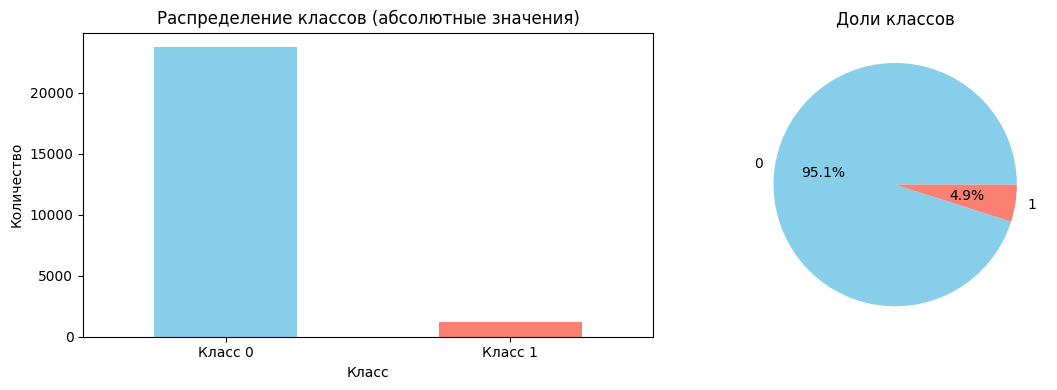


 ВАЖНО: Дисбаланс классов! Класс 1 (меньшинство) составляет ~4.9%
Размерность признаков: (25000, 60)
Количество признаков: 60
Целевая переменная: target, уникальных значений: 2
Train размер: (18750, 60), (18750,)
Test размер: (6250, 60), (6250,)

Распределение классов в train:
target
0    0.950773
1    0.049227
Name: proportion, dtype: float64

Распределение классов в test:
target
0    0.95088
1    0.04912
Name: proportion, dtype: float64

 Стратификация сохранила пропорции классов в train и test

DummyClassifier (most_frequent):
  Accuracy: 0.9509
  F1-score: 0.0000
  ROC-AUC:  0.5000

 Dummy всегда предсказывает класс большинства (0).
   Это нижняя граница качества — любая модель должна быть лучше!

LogisticRegression + StandardScaler:
  Accuracy: 0.9627
  F1-score: 0.4131
  ROC-AUC:  0.8397

 Логистическая регрессия — хороший линейный baseline.
   Если деревья/ансамбли не побьют её сильно, возможно, задача линейна.
Подбор гиперпараметров для Decision Tree через GridSearchCV...
Fitt

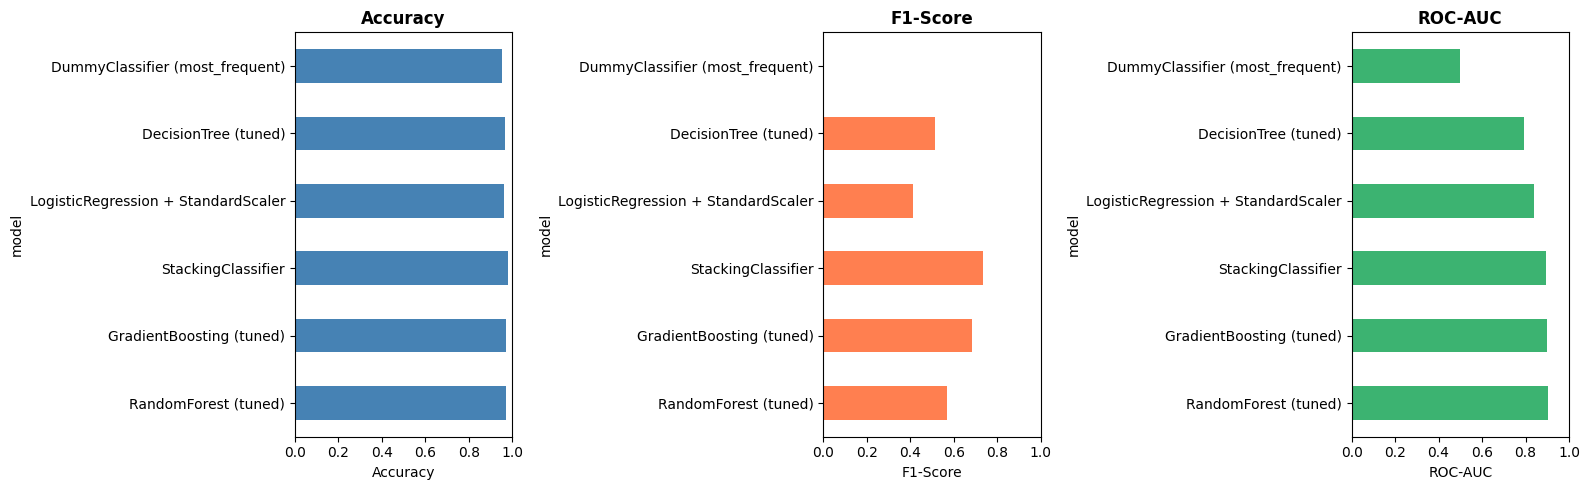


 ЛУЧШАЯ МОДЕЛЬ: RandomForest (tuned) (ROC-AUC = 0.9016)


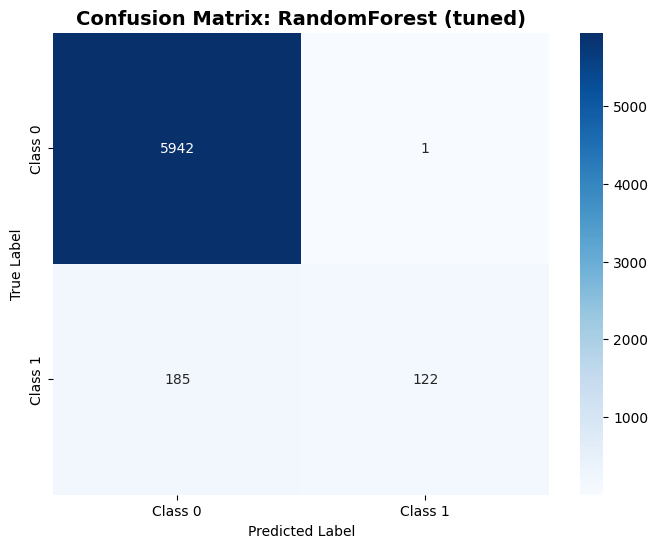


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98      5943
     Class 1       0.99      0.40      0.57       307

    accuracy                           0.97      6250
   macro avg       0.98      0.70      0.78      6250
weighted avg       0.97      0.97      0.96      6250



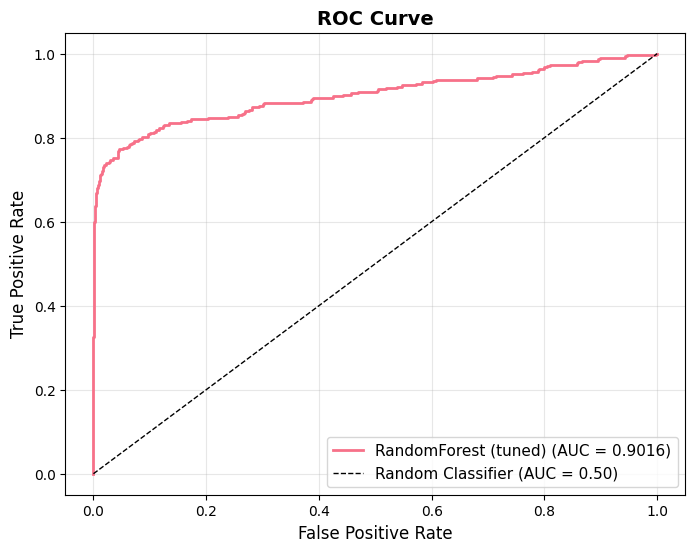

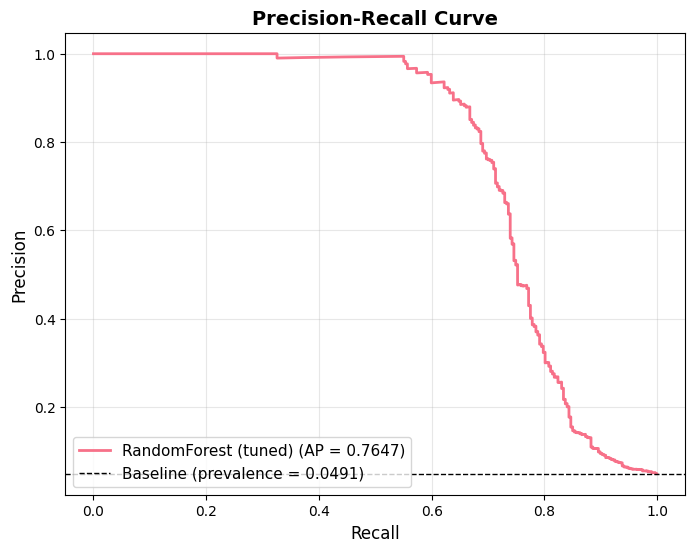


 Для дисбаланса классов PR-кривая часто информативнее ROC!
   Average Precision Score: 0.7647
Вычисление Permutation Importance (может занять время)...

Топ-15 наиболее важных признаков:
feature  importance_mean  importance_std
    f54         0.017282        0.002550
    f41         0.012510        0.002770
    f13         0.012159        0.003904
    f53         0.008915        0.005284
    f25         0.008824        0.002835
    f08         0.008212        0.003215
    f33         0.008010        0.003845
    f58         0.006671        0.003902
    f38         0.006274        0.003101
    f47         0.005984        0.004305
    f11         0.005768        0.003202
    f04         0.005573        0.002509
    f50         0.004832        0.001872
    f36         0.004451        0.006196
    f52         0.004267        0.002574


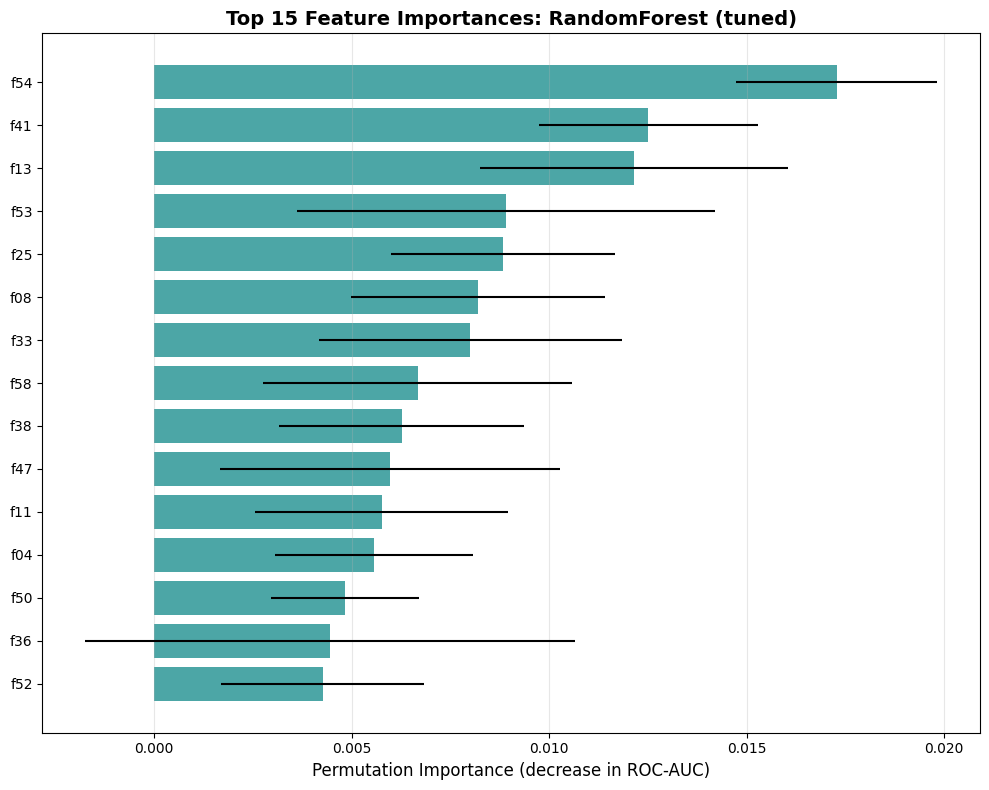


 Интерпретация:
   - Чем выше importance, тем сильнее признак влияет на предсказания
   - Если после перемешивания признака качество падает — признак важен
✓ Сохранено: artifacts/metrics_test.json
Сохранено: artifacts/search_summaries.json
Сохранено: artifacts/best_model.joblib (RandomForest (tuned))
Сохранено: artifacts/best_model_meta.json
Файлы:
  - metrics_test.json
  - search_summaries.json
  - best_model.joblib
  - best_model_meta.json
  - figures/ (5 графиков)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, 
    classification_report, confusion_matrix,
    roc_curve, precision_recall_curve, average_precision_score
)
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
df = pd.read_csv('../datasets/HW6/S06-hw-dataset-04.csv')
print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
print(df.head())
print("\nИнформация о столбцах:")
print(df.info())
print("\nСтатистики по признакам:")
print(df.describe())
print("\nПропущенные значения:")
print(df.isnull().sum().sum(), "пропусков в датасете")
print("\nРаспределение классов:")
print(df['target'].value_counts())
print("\nДоли классов:")
print(df['target'].value_counts(normalize=True))
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df['target'].value_counts().plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'])
ax[0].set_title('Распределение классов (абсолютные значения)', fontsize=12)
ax[0].set_xlabel('Класс')
ax[0].set_ylabel('Количество')
ax[0].set_xticklabels(['Класс 0', 'Класс 1'], rotation=0)
df['target'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                  colors=['skyblue', 'salmon'])
ax[1].set_title('Доли классов', fontsize=12)
ax[1].set_ylabel('')
plt.tight_layout()
plt.savefig('artifacts/figures/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"\nВАЖНО: Дисбаланс классов, Класс 1 (меньшинство) составляет ~{df['target'].mean()*100:.1f}%")
X = df.drop(columns=['id', 'target'])  
y = df['target']
print(f"Размерность признаков: {X.shape}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Целевая переменная: {y.name}, уникальных значений: {y.nunique()}")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=RANDOM_STATE, 
    stratify=y 
)
print(f"Train размер: {X_train.shape}, {y_train.shape}")
print(f"Test размер: {X_test.shape}, {y_test.shape}")
print(f"\nРаспределение классов в train:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в test:")
print(y_test.value_counts(normalize=True))
print("\n Стратификация сохранила пропорции классов в train и test")
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results = {
        'model': model_name,
        'accuracy': acc,
        'f1': f1,
        'roc_auc': roc_auc
    }
    
    print(f"\n{model_name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1-score: {f1:.4f}")
    if roc_auc:
        print(f"  ROC-AUC:  {roc_auc:.4f}")
    
    return results, y_pred, y_proba
dummy_model = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_results, dummy_pred, _ = evaluate_model(
    dummy_model, X_train, X_test, y_train, y_test, 
    'DummyClassifier (most_frequent)'
)
print("\n Dummy всегда предсказывает класс большинства (0).")
print("   Это нижняя граница качества — любая модель должна быть лучше!")
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE, max_iter=1000))
])
lr_results, lr_pred, lr_proba = evaluate_model(
    lr_pipeline, X_train, X_test, y_train, y_test,
    'LogisticRegression + StandardScaler'
)
print("\n Логистическая регрессия — хороший линейный baseline.")
print("   Если деревья/ансамбли не побьют её сильно, возможно, задача линейна.")
print("Подбор гиперпараметров для Decision Tree через GridSearchCV...")
tree_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 10, 20]
}
tree_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_search = GridSearchCV(
    tree_model, 
    tree_param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
tree_search.fit(X_train, y_train)
print(f"\nЛучшие параметры: {tree_search.best_params_}")
print(f"Лучший CV ROC-AUC: {tree_search.best_score_:.4f}")
best_tree = tree_search.best_estimator_
tree_results, tree_pred, tree_proba = evaluate_model(
    best_tree, X_train, X_test, y_train, y_test,
    'DecisionTree (tuned)'
)
print("Подбор гиперпараметров для Random Forest...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}
rf_model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
rf_search = GridSearchCV(
    rf_model,
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
rf_search.fit(X_train, y_train)
print(f"\nЛучшие параметры: {rf_search.best_params_}")
print(f"Лучший CV ROC-AUC: {rf_search.best_score_:.4f}")
best_rf = rf_search.best_estimator_
rf_results, rf_pred, rf_proba = evaluate_model(
    best_rf, X_train, X_test, y_train, y_test,
    'RandomForest (tuned)'
)
print("Подбор гиперпараметров для Gradient Boosting...")
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 5, 10]
}
gb_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_search = GridSearchCV(
    gb_model,
    gb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
gb_search.fit(X_train, y_train)
print(f"\nЛучшие параметры: {gb_search.best_params_}")
print(f"Лучший CV ROC-AUC: {gb_search.best_score_:.4f}")
best_gb = gb_search.best_estimator_
gb_results, gb_pred, gb_proba = evaluate_model(
    best_gb, X_train, X_test, y_train, y_test,
    'GradientBoosting (tuned)'
)
print("Обучение Stacking Classifier...")
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=RANDOM_STATE)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=RANDOM_STATE)),
    ('tree', DecisionTreeClassifier(max_depth=7, random_state=RANDOM_STATE))
]
meta_model = LogisticRegression(random_state=RANDOM_STATE)

stacking_model = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)
stacking_model.fit(X_train, y_train)
stacking_results, stacking_pred, stacking_proba = evaluate_model(
    stacking_model, X_train, X_test, y_train, y_test,
    'StackingClassifier'
)
all_results = [
    dummy_results,
    lr_results,
    tree_results,
    rf_results,
    gb_results,
    stacking_results
]
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('roc_auc', ascending=False)
print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ (отсортировано по ROC-AUC)")
print("=" * 70)
print(results_df.to_string(index=False))
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
results_df.plot(x='model', y='accuracy', kind='barh', ax=axes[0], legend=False, color='steelblue')
axes[0].set_title('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Accuracy')
axes[0].set_xlim([0, 1])
results_df.plot(x='model', y='f1', kind='barh', ax=axes[1], legend=False, color='coral')
axes[1].set_title('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_xlabel('F1-Score')
axes[1].set_xlim([0, 1])
results_df.plot(x='model', y='roc_auc', kind='barh', ax=axes[2], legend=False, color='mediumseagreen')
axes[2].set_title('ROC-AUC', fontsize=12, fontweight='bold')
axes[2].set_xlabel('ROC-AUC')
axes[2].set_xlim([0, 1])
plt.tight_layout()
plt.savefig('artifacts/figures/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
best_model_name = results_df.iloc[0]['model']
best_model_roc = results_df.iloc[0]['roc_auc']
print(f"\n ЛУЧШАЯ МОДЕЛЬ: {best_model_name} (ROC-AUC = {best_model_roc:.4f})")
if 'GradientBoosting' in best_model_name:
    best_model = best_gb
    best_pred = gb_pred
    best_proba = gb_proba
elif 'RandomForest' in best_model_name:
    best_model = best_rf
    best_pred = rf_pred
    best_proba = rf_proba
elif 'Stacking' in best_model_name:
    best_model = stacking_model
    best_pred = stacking_pred
    best_proba = stacking_proba
else:
    best_model = best_tree
    best_pred = tree_pred
    best_proba = tree_proba
cm = confusion_matrix(y_test, best_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
ax.set_title(f'Confusion Matrix: {best_model_name}', fontsize=14, fontweight='bold')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.savefig('artifacts/figures/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, best_pred, target_names=['Class 0', 'Class 1']))
fpr, tpr, thresholds = roc_curve(y_test, best_proba)
roc_auc = roc_auc_score(y_test, best_proba)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, linewidth=2, label=f'{best_model_name} (AUC = {roc_auc:.4f})')
ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.50)')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(alpha=0.3)
plt.savefig('artifacts/figures/roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()
precision, recall, thresholds_pr = precision_recall_curve(y_test, best_proba)
avg_precision = average_precision_score(y_test, best_proba)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(recall, precision, linewidth=2, label=f'{best_model_name} (AP = {avg_precision:.4f})')
ax.axhline(y=y_test.mean(), color='k', linestyle='--', linewidth=1, 
           label=f'Baseline (prevalence = {y_test.mean():.4f})')
ax.set_xlabel('Recall', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax.legend(loc='lower left', fontsize=11)
ax.grid(alpha=0.3)
plt.savefig('artifacts/figures/pr_curve.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"\n Для дисбаланса классов PR-кривая часто информативнее ROC")
print(f"Average Precision Score: {avg_precision:.4f}")
print("Вычисление Permutation Importance (может занять время)...")
perm_importance = permutation_importance(
    best_model, X_test, y_test, 
    n_repeats=10, 
    random_state=RANDOM_STATE,
    scoring='roc_auc',
    n_jobs=-1
)
perm_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)
top_n = 15
top_features = perm_importance_df.head(top_n)
print(f"\nТоп-{top_n} наиболее важных признаков:")
print(top_features.to_string(index=False))
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(top_features)), top_features['importance_mean'], 
        xerr=top_features['importance_std'], 
        color='teal', alpha=0.7)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['feature'])
ax.set_xlabel('Permutation Importance (decrease in ROC-AUC)', fontsize=12)
ax.set_title(f'Top {top_n} Feature Importances: {best_model_name}', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/figures/feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n Интерпретация:")
print("   - Чем выше importance, тем сильнее признак влияет на предсказания")
print("   - Если после перемешивания признака качество падает — признак важен")
Path('artifacts').mkdir(exist_ok=True)
Path('artifacts/figures').mkdir(exist_ok=True)
metrics_test = {
    'models': all_results
}
with open('artifacts/metrics_test.json', 'w', encoding='utf-8') as f:
    json.dump(metrics_test, f, indent=2, ensure_ascii=False)
print("Сохранено: artifacts/metrics_test.json")
search_summaries = {
    'DecisionTree': {
        'best_params': tree_search.best_params_,
        'best_cv_score': float(tree_search.best_score_)
    },
    'RandomForest': {
        'best_params': rf_search.best_params_,
        'best_cv_score': float(rf_search.best_score_)
    },
    'GradientBoosting': {
        'best_params': gb_search.best_params_,
        'best_cv_score': float(gb_search.best_score_)
    }
}
with open('artifacts/search_summaries.json', 'w', encoding='utf-8') as f:
    json.dump(search_summaries, f, indent=2, ensure_ascii=False)
print("Сохранено: artifacts/search_summaries.json")
joblib.dump(best_model, 'artifacts/best_model.joblib')
print(f"Сохранено: artifacts/best_model.joblib ({best_model_name})")
best_model_meta = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'test_metrics': {
        'accuracy': float(results_df.iloc[0]['accuracy']),
        'f1_score': float(results_df.iloc[0]['f1']),
        'roc_auc': float(results_df.iloc[0]['roc_auc'])
    },
    'random_state': RANDOM_STATE,
    'dataset': 'S06-hw-dataset-04.csv',
    'train_size': len(X_train),
    'test_size': len(X_test)
}

with open('artifacts/best_model_meta.json', 'w', encoding='utf-8') as f:
    json.dump(best_model_meta, f, indent=2, ensure_ascii=False)
print("Сохранено: artifacts/best_model_meta.json")
print("Файлы:")
print("  - metrics_test.json")
print("  - search_summaries.json")
print("  - best_model.joblib")
print("  - best_model_meta.json")
print("  - figures/ (5 графиков)")
